In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from mplfinance.original_flavor import candlestick_ohlc
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import backtrader as bt
import backtrader.indicators as btind
import backtrader.feeds as btfeeds

In [21]:
gs_df =pd.read_csv("./data/gs.csv", index_col='Date', parse_dates=True)
gs_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-05-04,76.0000,77.250,70.0000,70.3750,52.507088,22320900
1999-05-05,69.8750,69.875,66.2500,69.1250,51.574482,7565700
1999-05-06,68.0000,69.375,67.0625,67.9375,50.688469,2905700
1999-05-07,67.9375,74.875,66.7500,74.1250,55.304985,4862300
1999-05-10,73.3750,73.500,70.2500,70.6875,52.740234,2589400


In [22]:
gs_df_tail = gs_df.tail(300)

In [16]:
gs_df['Short SMA'] = gs_df['Close'].rolling(window=80).mean()
gs_df['Long SMA'] = gs_df['Close'].rolling(window=200).mean()

In [17]:
# Bollinger Bands 34 days (vs 20) with 2.5 sigma (vs 2)

# Close Price 34 Day MA
gs_df['Close 34 MA'] = gs_df['Close'].rolling(window=34).mean()
# Upper Band = 34 Day MA + 2 * Std Dev(34 Days)
gs_df['Upper'] = gs_df['Close 34 MA'] + 2.5 * (gs_df['Close'].rolling(34).std())
# Lower Band = 34 Day MA - 2 * Std Dev (20 Days)
gs_df['Lower'] = gs_df['Close 34 MA'] - 2.5 * (gs_df['Close'].rolling(34).std())

In [18]:
# MACD

gs_df['exp12'] = gs_df['Close'].ewm(span=12, adjust=False).mean()
gs_df['exp26'] = gs_df['Close'].ewm(span=26,adjust=False).mean()
gs_df['macd'] = gs_df['exp12'] - gs_df['exp26']
gs_df['signal'] = gs_df['macd'].ewm(span=9, adjust=False).mean()
gs_df['histogram'] = gs_df['macd']- gs_df['signal']

In [19]:
# RSI 

gs_df['move'] = gs_df['Close'] - gs_df['Close'].shift(1)
gs_df['up'] = np.where(gs_df['move'] > 0, gs_df['move'], 0)
gs_df['down'] = np.where(gs_df['move'] < 0, gs_df['move'],0)
gs_df['average_gain'] = gs_df['up'].rolling(14).mean()
gs_df['average_loss'] = gs_df['down'].abs().rolling(14).mean()
gs_df['RS'] = 100.0 - ( 100.0 / (1 + gs_df['average_gain'] / gs_df['average_loss'] ) )

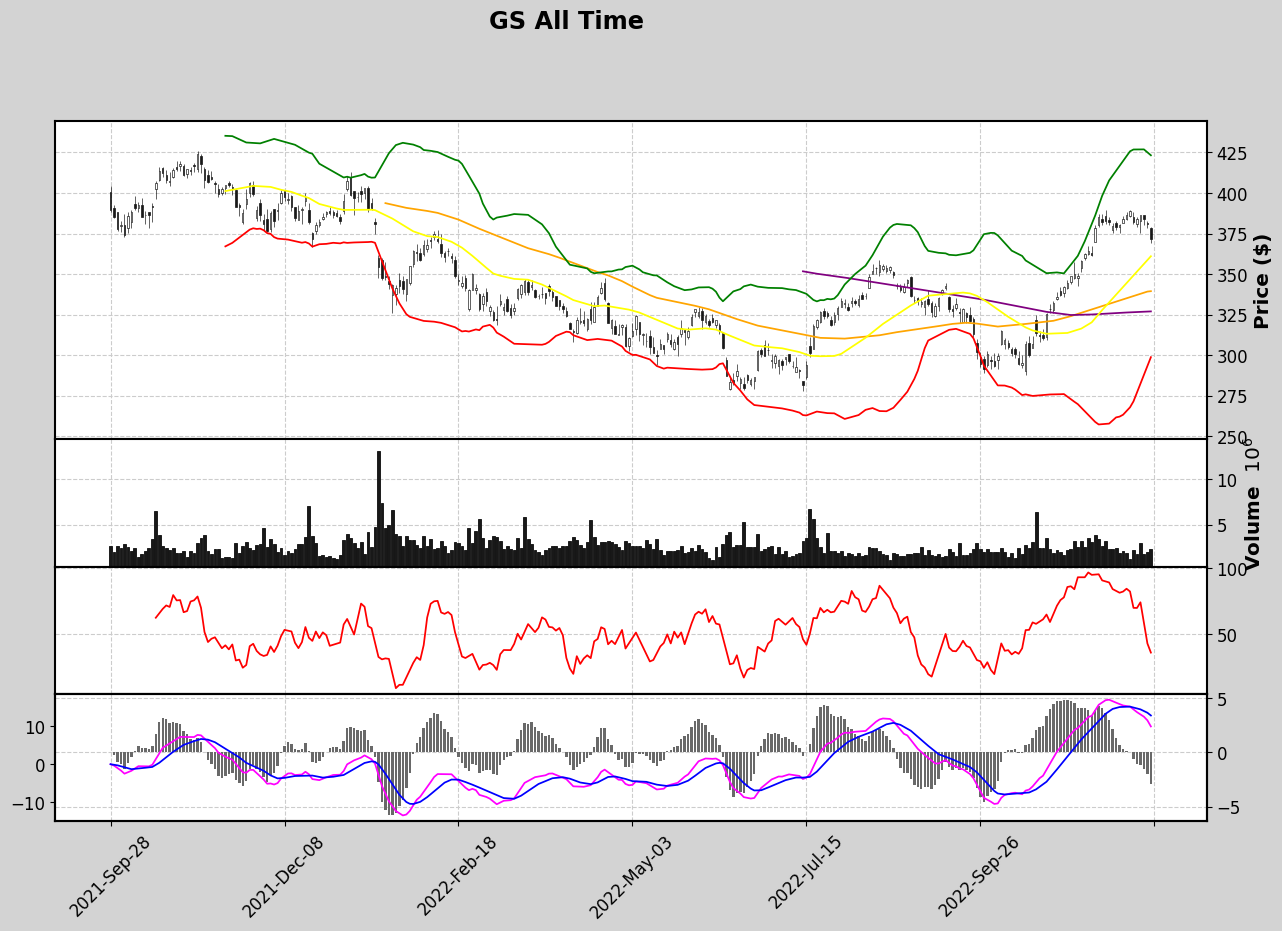

In [20]:
apd = [
        # MA's
        mpf.make_addplot(gs_df['Short SMA'],color='orange'),
        mpf.make_addplot(gs_df['Long SMA'], color='purple'),
        # BB's
        mpf.make_addplot(gs_df['Upper'],color='green'),
        mpf.make_addplot(gs_df['Lower'], color='red'),
        mpf.make_addplot(gs_df['Close 34 MA'], color='yellow'),
        mpf.make_addplot(gs_df['RS'], color='red',panel=2),
        # MACD
        mpf.make_addplot(gs_df['histogram'],type='bar',width=0.7,panel=3,color='dimgray',alpha=1,secondary_y=False),
        mpf.make_addplot(gs_df['macd'],panel=3,color='fuchsia',secondary_y=True),
        mpf.make_addplot(gs_df['signal'],panel=3,color='b',secondary_y=True),
    
]

mpf.plot(gs_df[['Open','High','Low','Close','Volume']].tail(300), 
         type='candle', 
         title='GS All Time', 
         style=mpf.make_mpf_style(base_mpf_style='classic',rc={'figure.facecolor':'lightgray'}),
         ylabel='Price ($)',
         volume=True, 
         addplot=apd,
         figsize=(16,10));